## Terms for Use
Solvers are responsible for complying with all terms of use for the data sources they access.  All code in this document is provided using the [CC0 1.0 Universal (CC0 1.0) Public Domain Dedication](https://creativecommons.org/publicdomain/zero/1.0/).  The examples have been tested using Python 3 but have not been tested under Python 2.  Note that data providers may have changed their APIs or data formats after this notebook was published.

### Boring Details
The code cells below set up the notebook environment and load necessary libraries

In [1]:
%matplotlib inline

In [2]:
import matplotlib
matplotlib.style.use("seaborn-dark")
import os
import json
import pandas as pd
from dateutil.parser import parse # To convert strings to timestamps
import warnings
import urllib3
http = urllib3.PoolManager()
GFC_HOME = os.path.abspath("../../..")
auth_file_path = os.path.join(GFC_HOME, "src", "resources", "auth.json")
with open(os.path.join(GFC_HOME, auth_file_path), "r") as f:
    api_key_dict = json.load(f)
data_path = os.path.join(GFC_HOME, "data")

## [STOXX](https://www.stoxx.com)

STOXX also provides indices for financial indices which are used in some IFPs.  STOXX doesn't have a programmating API so you'll need to use the Python `urllib` module to pull down the data.  The example below will walk through this.

### Example: VSTOXX

VSTOXX is the volatility of the Euro STOXX 50 index and has been the subject of IFPs in the past.  The historical data is available in textual format at https://www.stoxx.com/document/Indices/Current/HistoricalData/h_vstoxx.txt.  In the example we will use the `urllib` module to process this data into a pandas Data Frame.

In [3]:
http = urllib3.PoolManager()
query_url = "https://www.stoxx.com/document/Indices/Current/HistoricalData/h_v2tx.txt"
with warnings.catch_warnings(): # Suppresses the InsecureRequestWarning
    warnings.simplefilter("ignore")
    r = http.request("GET", query_url)

raw_data = r.data.decode("utf-8")
_data = raw_data.split("\n") # Splitting into separate lines.
_data = [row.split(";") for row in _data] # Splitting each line into columns
_columns = _data[0] # The first row holds the names for the data frame columns
_data = [{"Date": parse("-".join(row[0].split(".")), dayfirst=True),
          "Indexvalue": float(row[2])}
         for row in _data[1:-1]]  # Process each row into a dict, creating timestamps and floating values.
print("There are {} rows in the data".format(len(_data)))
v2tx_df = pd.DataFrame(_data)
v2tx_df.set_index(v2tx_df.columns[0], inplace=True, verify_integrity=True) # Converting to a time indexed dataframe with one column
v2tx_df.tail()

There are 5163 rows in the data


,Indexvalue
Date,
2019-04-09,14.5187
2019-04-10,14.2810
2019-04-11,12.5950
2019-04-12,11.8770
2019-04-15,11.4864


The historical time series for the VSTOXX data is shown below.  As with the Quandl data we now have a time series that we can apply modeling techniques to.

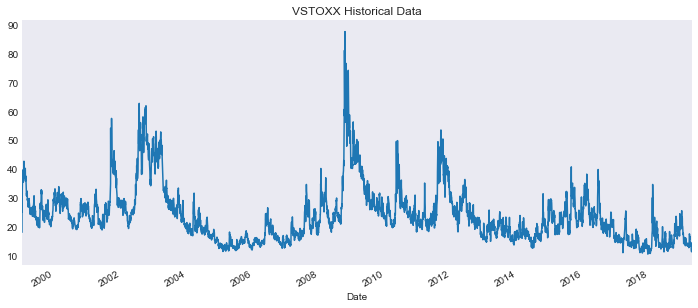

In [4]:
v2tx_df["Indexvalue"].plot(figsize=(12,5), title="VSTOXX Historical Data");